# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [103]:
#city_name = "Houston"
#test_url = ("https://api.openweathermap.org/data/2.5/weather"
            #f"?q={city_name}&appid={weather_api_key}&units=imperial")
#print(test_url)

In [104]:
#BASE_URL = ("https://api.openweathermap.org/data/2.5/weather"
           #f"?appid={weather_api_key}&units=imperial")

In [105]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [114]:
# Set the API base URL
api_key = "955fd6c3cd625ea0fcbe70c62c805ff7"

url = "http://api.openweathermap.org/data/2.5/weather?q={city}&appid=" + api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid=" + api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["coord"]["lon"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    

              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
City not found. Skipping...
Processing Record 2 of Set 1 | hovd
City not found. Skipping...
Processing Record 3 of Set 1 | avarua
City not found. Skipping...
Processing Record 4 of Set 1 | nikolskoye
City not found. Skipping...
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | qaanaaq
City not found. Skipping...
Processing Record 7 of Set 1 | amderma
City not found. Skipping...
Processing Record 8 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 9 of Set 1 | atuona
City not found. Skipping...
Processing Record 10 of Set 1 | harrismith
City not found. Skipping...
Processing Record 11 of Set 1 | abhar
City not found. Skipping...
Processing Record 12 of Set 1 | calama
City not found. Skipping...
Processing Record 13 of Set 1 | rikitea
City not found. Skipping...
Processing Record 14 of Set 1 | kamenskoye
City not f

City not found. Skipping...
Processing Record 20 of Set 1 | nanortalik
City not found. Skipping...
Processing Record 21 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 22 of Set 1 | miraflores
City not found. Skipping...
Processing Record 23 of Set 1 | palauig
City not found. Skipping...
Processing Record 24 of Set 1 | barrow
City not found. Skipping...
Processing Record 25 of Set 1 | san patricio
City not found. Skipping...
Processing Record 26 of Set 1 | torbay
City not found. Skipping...
Processing Record 27 of Set 1 | matara
City not found. Skipping...
Processing Record 28 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 29 of Set 1 | burnie
City not found. Skipping...
Processing Record 30 of Set 1 | khatanga
City not found. Skipping...
Processing Record 31 of Set 1 | pisco
City not found. Skipping...
Processing Record 32 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 33 of Set 1 | marsabit
City not found. Skipping...
Proc

City not found. Skipping...
Processing Record 40 of Set 1 | beloha
City not found. Skipping...
Processing Record 41 of Set 1 | nantucket
City not found. Skipping...
Processing Record 42 of Set 1 | moyo
City not found. Skipping...
Processing Record 43 of Set 1 | morros
City not found. Skipping...
Processing Record 44 of Set 1 | manoel urbano
City not found. Skipping...
Processing Record 45 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 46 of Set 1 | sabha
City not found. Skipping...
Processing Record 47 of Set 1 | moryakovskiy zaton
City not found. Skipping...
Processing Record 48 of Set 1 | gainesville
City not found. Skipping...
Processing Record 49 of Set 1 | victoria
City not found. Skipping...
Processing Record 0 of Set 2 | evensk
City not found. Skipping...
Processing Record 1 of Set 1 | inhambane
City not found. Skipping...
Processing Record 2 of Set 1 | batagay-alyta
City not found. Skipping...
Processing Record 3 of Set 1 | kirando
City not found. Skipping

City not found. Skipping...
Processing Record 10 of Set 1 | touros
City not found. Skipping...
Processing Record 11 of Set 1 | myitkyina
City not found. Skipping...
Processing Record 12 of Set 1 | redmond
City not found. Skipping...
Processing Record 13 of Set 1 | lithgow
City not found. Skipping...
Processing Record 14 of Set 1 | ampanihy
City not found. Skipping...
Processing Record 15 of Set 1 | tawkar
City not found. Skipping...
Processing Record 16 of Set 1 | iracoubo
City not found. Skipping...
Processing Record 17 of Set 1 | alpena
City not found. Skipping...
Processing Record 18 of Set 1 | zhigansk
City not found. Skipping...
Processing Record 19 of Set 1 | keti bandar
City not found. Skipping...
Processing Record 20 of Set 1 | sorvag
City not found. Skipping...
Processing Record 21 of Set 1 | lata
City not found. Skipping...
Processing Record 22 of Set 1 | alekseyevsk
City not found. Skipping...
Processing Record 23 of Set 1 | arraial do cabo
City not found. Skipping...
Proces

City not found. Skipping...
Processing Record 32 of Set 1 | port-cartier
City not found. Skipping...
Processing Record 33 of Set 1 | colomi
City not found. Skipping...
Processing Record 34 of Set 1 | salym
City not found. Skipping...
Processing Record 35 of Set 1 | didsbury
City not found. Skipping...
Processing Record 36 of Set 1 | yusva
City not found. Skipping...
Processing Record 37 of Set 1 | aflu
City not found. Skipping...
Processing Record 38 of Set 1 | porto santo
City not found. Skipping...
Processing Record 39 of Set 1 | tongliao
City not found. Skipping...
Processing Record 40 of Set 1 | gornopravdinsk
City not found. Skipping...
Processing Record 41 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 42 of Set 1 | conde
City not found. Skipping...
Processing Record 43 of Set 1 | plouzane
City not found. Skipping...
Processing Record 44 of Set 1 | fare
City not found. Skipping...
Processing Record 45 of Set 1 | bonavista
City not found. Skipping...
Processing 

City not found. Skipping...
Processing Record 2 of Set 1 | narsaq
City not found. Skipping...
Processing Record 3 of Set 1 | vostok
City not found. Skipping...
Processing Record 4 of Set 1 | kiama
City not found. Skipping...
Processing Record 5 of Set 1 | warqla
City not found. Skipping...
Processing Record 6 of Set 1 | honiara
City not found. Skipping...
Processing Record 7 of Set 1 | sulangan
City not found. Skipping...
Processing Record 8 of Set 1 | askino
City not found. Skipping...
Processing Record 9 of Set 1 | bayan
City not found. Skipping...
Processing Record 10 of Set 1 | tias
City not found. Skipping...
Processing Record 11 of Set 1 | pacific grove
City not found. Skipping...
Processing Record 12 of Set 1 | ahuimanu
City not found. Skipping...
Processing Record 13 of Set 1 | alofi
City not found. Skipping...
Processing Record 14 of Set 1 | sangmelima
City not found. Skipping...
Processing Record 15 of Set 1 | barranca
City not found. Skipping...
Processing Record 16 of Set 1

In [112]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

city_data_df

""


In [113]:
# Display sample data
city_data_df.head(5)

""


In [109]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data_file.csv", index_label="City_ID")

In [110]:
# Read saved data
city_data_df = pd.read_csv("output_data_file.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

""
City_ID


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

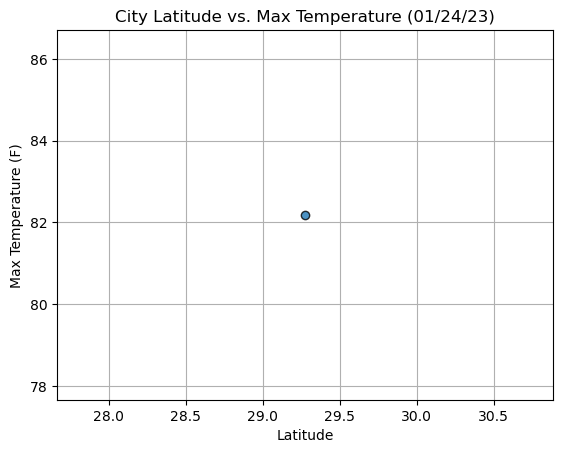

In [111]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_lat, 
           city_max_temp,
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

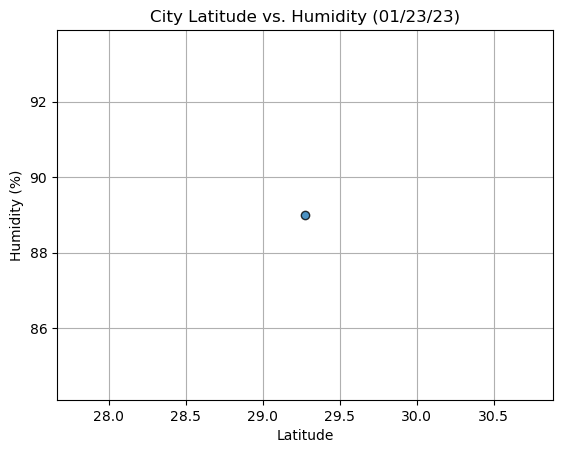

In [95]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_lat, 
            city_humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

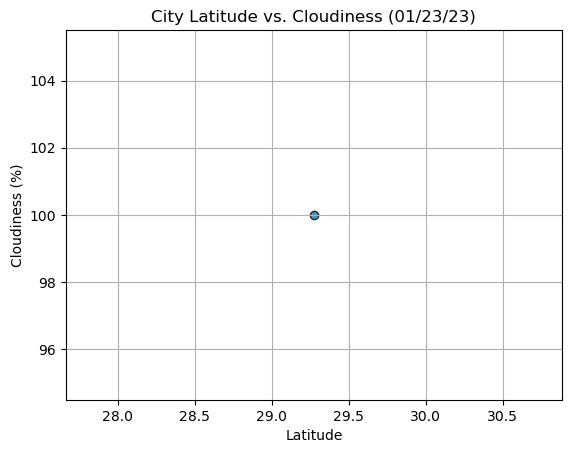

In [98]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_lat, 
            city_clouds,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

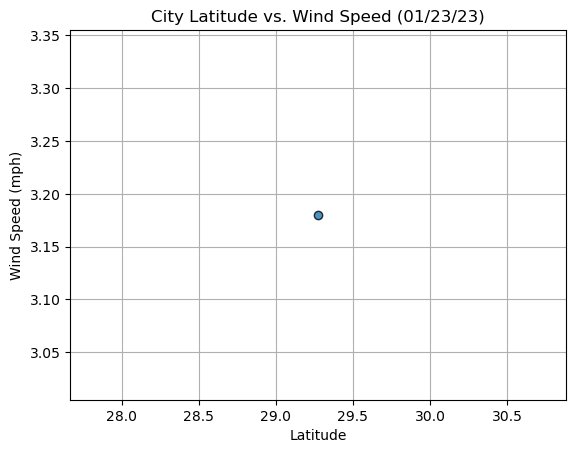

In [100]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_lat, 
            city_wind,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE